In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [40]:
INPUT_DIR = "./data"
df = pd.read_csv(os.path.join(INPUT_DIR, "train.csv"))

In [41]:
df.shape

(42000, 785)

In [42]:
X_train = df.iloc[:, 1:]
y_train = df.iloc[:, 0]

print(X_train.shape)
print(y_train.shape)

(42000, 784)
(42000,)


In [43]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
def getSample(n):
    sample = X_train.iloc[n]
    sample = np.array(sample).reshape((28, 28))
    return sample

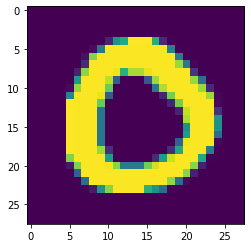

In [45]:
sample = getSample(4)
imgplot = plt.imshow(sample)

In [46]:
print("The label of the image is : ", y_train[4])

The label of the image is :  0


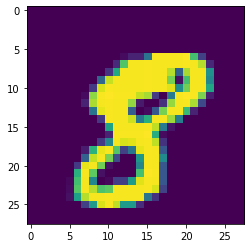

In [47]:
sample = getSample(10)
imgplot = plt.imshow(sample)

In [48]:
print("The label of the image is : ", y_train[10])

The label of the image is :  8


### 2-D Visualization using PCA

In [49]:
data = X_train.head(15000)
labels = y_train.head(15000)

In [50]:
from sklearn.preprocessing import StandardScaler
std_data = StandardScaler().fit_transform(data)
print(std_data.shape)

(15000, 784)


In [51]:
covar_matrix = np.matmul(std_data.T, std_data)

In [60]:
from numpy import linalg as LA
eigen_values, eigen_vectors = LA.eig(covar_matrix)

In [61]:
print(eigen_values.shape)
print(eigen_vectors.shape)

(784,)
(784, 784)


In [62]:
sort_perm = eigen_values.argsort()
eigen_values.sort()

In [63]:
eigen_vectors = eigen_vectors[:, sort_perm]

In [65]:
print(eigen_vectors.shape)

(784, 784)


In [79]:
pca_2d = eigen_vectors[:, -3:-1]
print(pca_2d.shape)

(784, 2)


In [80]:
new_data = np.dot(data, pca_2d)
print(new_data.shape)

(15000, 2)


In [81]:
new_df = pd.DataFrame(new_data, columns=['1st Component', '2nd Component'])
new_df.head()

,1st Component,2nd Component
0,-289.343894,563.464224
1,-43.769841,-369.459961
2,-128.989577,267.642796
3,10.468747,-298.572206
4,1.696078,-344.880706


In [82]:
new_df['label'] = labels

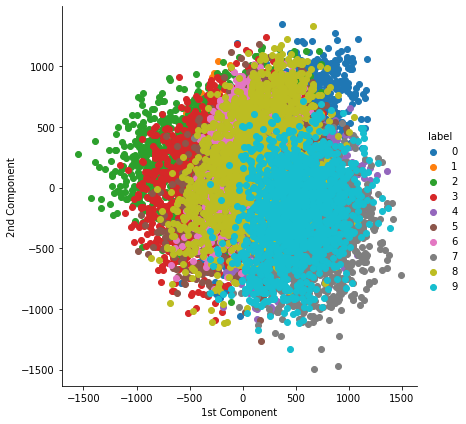

In [93]:
import seaborn as sns
sns.FacetGrid(new_df, hue='label', height=6).map(plt.scatter, '1st Component', '2nd Component').add_legend()

### PCA using Scikit-Learn

In [84]:
from sklearn import decomposition
pca = decomposition.PCA()

In [85]:
pca.n_components = 2
pca_data = pca.fit_transform(data)

In [86]:
print(pca_data.shape)

(15000, 2)


In [89]:
pca_df = pd.DataFrame(pca_data, columns=['1st Component', '2nd Component'])
print(pca_df.shape)

(15000, 2)


In [90]:
pca_df['label'] = labels 

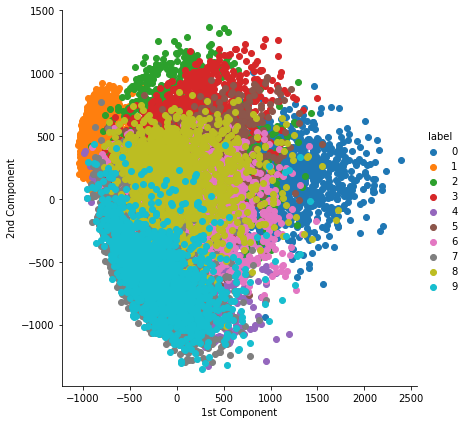

In [94]:
import seaborn as sns
sns.FacetGrid(pca_df, hue='label', height=6).map(plt.scatter, '1st Component', '2nd Component').add_legend()